In [1]:
#task 1 - kmeans clustering

import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from sklearn import mixture

C:\Users\rasita\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import util_mnist_reader
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [4]:
kmeans = KMeans(n_clusters = np.max(Y_train)+1)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_test)

In [5]:
acc_task_1 = metrics.completeness_score(Y_test, y_kmeans) * 100
print('Accuracy: ', acc_task_1, '%')

Accuracy:  51.71631332799818 %


In [11]:
print('Accuracy: {}%'.format(metrics.adjusted_mutual_info_score(Y_test, y_kmeans) *100))

Accuracy: 49.110042605860045%


C:\Users\rasita\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [7]:
from scipy.stats import mode
labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(Y_test[mask])[0]
print(labels)

[9 4 1 ... 6 1 5]


In [9]:
from sklearn.metrics import accuracy_score
acc_2 = metrics.accuracy_score(Y_test, labels) * 100
print('Accuracy: ', acc_2, '%')

Accuracy:  55.75 %


In [12]:
#part 2 autoencoder with kmeans

from keras.models import Input, Model
from keras.layers import Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore")

In [13]:
import util_mnist_reader
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

In [14]:
X_train = X_train.astype("float32")/255.0
X_test = X_test.astype("float32")/255.0
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


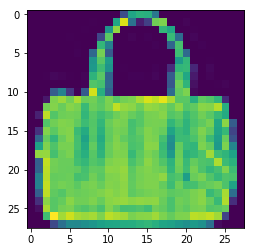

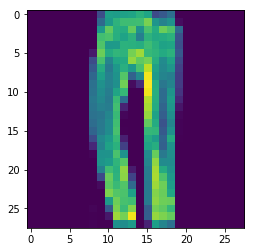

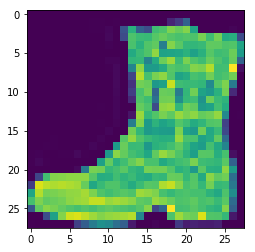

In [15]:
plt.imshow(X_train[4000].reshape(28,28))
plt.show()
plt.imshow(X_train[1500].reshape(28,28))
plt.show()
plt.imshow(X_train[150].reshape(28,28))
plt.show()

In [16]:
input_img= Input(shape=(784,))

In [17]:
encoded = Dense(units=32, activation='relu')(input_img)

In [18]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [19]:
autoencoder=Model(input_img, decoded)

In [20]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [21]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.5260 - accuracy: 0.4486 - val_loss: 0.4619 - val_accuracy: 0.4782
Epoch 2/50
60000/60000 [==============================] - 4s 58us/step - loss: 0.4336 - accuracy: 0.4865 - val_loss: 0.4107 - val_accuracy: 0.4869
Epoch 3/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.3989 - accuracy: 0.4907 - val_loss: 0.3914 - val_accuracy: 0.4903
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.3821 - accuracy: 0.4935 - val_loss: 0.3760 - val_accuracy: 0.4928
Epoch 5/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.3679 - accuracy: 0.4959 - val_loss: 0.3633 - val_accuracy: 0.4949
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.3564 - accuracy: 0.4979 - val_loss: 0.3532 - val_accuracy: 0.4967
Epoch 7/50
60000/60000 [==============================] - 3s 56us/st

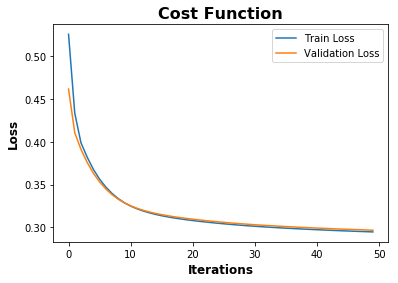

In [23]:
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel('Iterations', fontweight = "bold", fontsize = 12)
plt.ylabel('Loss', fontweight = "bold", fontsize = 12)
plt.title("Cost Function", fontweight = "bold", fontsize = 16)
plt.legend()
plt.show()

In [24]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

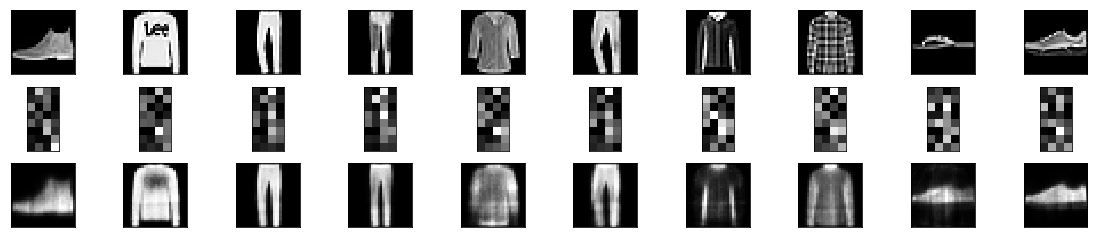

In [25]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    
plt.show()

In [26]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 10, random_state=4)
clf.fit(X_train)
y_pred = clf.predict(X_test)

In [27]:
print('Accuracy: {}%'.format((metrics.adjusted_mutual_info_score(Y_test, y_pred))*100))

Accuracy: 50.00293408678331%


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[  6  31 585  96  34   0   1 242   0   5]
 [  0 891  50  22   9   0   0  28   0   0]
 [  4   4  20  65 565   0   0 338   0   4]
 [  2 504 277  99  10   0   0 105   0   3]
 [  4  27 134  42 625   0   0 163   0   5]
 [  0   0   0 646   0  73 230   6  45   0]
 [ 15  12 189 121 308   0   0 355   0   0]
 [  0   0   0  59   0 152 787   0   2   0]
 [355   7   3  87  60  10  39  30   1 408]
 [  0   0   0  29   0 519  23   4 423   2]]


In [29]:
from sklearn import metrics
acc_task_2 = metrics.completeness_score(Y_test, y_pred) * 100
print('Accuracy: ', acc_task_2, '%')

Accuracy:  52.41242574402355 %


In [30]:
#task 3 - Autoencoder with GMM

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [31]:
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline

In [32]:
from keras.datasets import mnist
import pandas as pd
from sklearn import mixture
from keras.callbacks import TensorBoard

In [33]:
import util_mnist_reader
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

In [34]:
encoding_dim = 6
input_img = Input(shape = (784,))

In [35]:
d = Dense(256, activation = 'selu')(input_img)
d = Dense(128, activation = 'selu')(d)
encoded = Dense(encoding_dim, activation = 'selu', kernel_regularizer = regularizers.l2(0.01))(d)

In [36]:
d = Dense(128, activation = 'selu')(encoded)
d = Dense(256, activation = 'selu')(d)
decoded = Dense(784, activation = 'sigmoid')(d)

In [37]:
autoencoder = Model(input_img, decoded)

In [38]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape = (encoding_dim,))

In [39]:
deco = autoencoder.layers[-3](encoded_input)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)

In [40]:
decoder = Model(encoded_input, deco)

In [52]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               2014

In [41]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
X_train = X_train.astype("float32")/255.0
X_test = X_test.astype("float32")/255.0
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [43]:
history = autoencoder.fit(X_train, X_train, 
                           epochs = 50,
                           batch_size = 2056,
                           shuffle = True,
                           validation_data = (X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.5991 - accuracy: 0.4571 - val_loss: 0.4925 - val_accuracy: 0.4901
Epoch 2/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.4546 - accuracy: 0.4938 - val_loss: 0.4237 - val_accuracy: 0.4915
Epoch 3/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.4037 - accuracy: 0.4957 - val_loss: 0.3876 - val_accuracy: 0.4943
Epoch 4/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.3765 - accuracy: 0.4975 - val_loss: 0.3688 - val_accuracy: 0.4952
Epoch 5/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.3606 - accuracy: 0.4983 - val_loss: 0.3550 - val_accuracy: 0.4959
Epoch 6/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.3482 - accuracy: 0.4991 - val_loss: 0.3450 - val_accuracy: 0.4981
Epoch 7/50
60000/60000 [==============================] - 7s 1

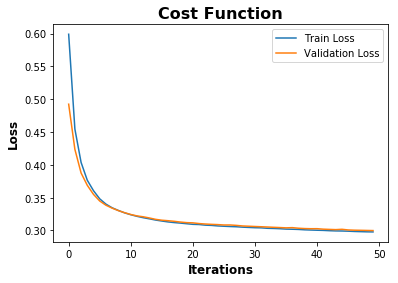

In [44]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel('Iterations', fontweight = "bold", fontsize = 12)
plt.ylabel('Loss', fontweight = "bold", fontsize = 12)
plt.title("Cost Function", fontweight = "bold", fontsize = 16)
plt.legend()
plt.show()

In [45]:
encoded_imgs = encoder.predict(X_test)

In [46]:
clf = mixture.GaussianMixture(n_components = 10)

In [47]:
clf.fit(encoded_imgs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [48]:
clustered_training_set = clf.fit_predict(encoded_imgs)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, clustered_training_set)
print(cm)

[[  0  95   6  12   0   0 750   4  55  78]
 [  0  72   0   7   0 834   1   1  10  75]
 [  0   3   4 512   0   0   4   3 441  33]
 [  0 549   0   1   0   2  27   3  34 384]
 [  0   5   2 610   0   0   2   4 164 213]
 [367   4 155   0 473   0   1   0   0   0]
 [  0  47  10 237   0   0 199   7 384 116]
 [  3   0 175   0 822   0   0   0   0   0]
 [  1  45 401  33   5   0   1 473  35   6]
 [547   1 431   1  18   0   0   0   1   1]]


In [50]:
from sklearn import metrics
acc_task_3 = metrics.completeness_score(Y_test, clustered_training_set) * 100
print('Accuracy: ', acc_task_3, '%')

Accuracy:  58.75057100425949 %


In [51]:
print('Accuracy: {}%'.format((metrics.adjusted_mutual_info_score(Y_test, clustered_training_set))*100))

Accuracy: 57.80573560596108%
